In [1]:
try:
    get_ipython().run_line_magic("load_ext", "lab_black")
    # %load_ext lab_black
    %config InlineBackendß.figure_format = 'retina'
except:
    print("Could not load lab_black")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import itertools

# Dataset

In [2]:
# load metadata

path = "meta.csv"
df_coords = pd.read_csv(path)
df_coords["group"] = df_coords["cat"].str[0]
df_coords

,cat,x,y,group
0,P1,190,190,P
1,P2,190,890,P
2,I1,890,190,I
3,I2,590,770,I
4,I3,670,510,I


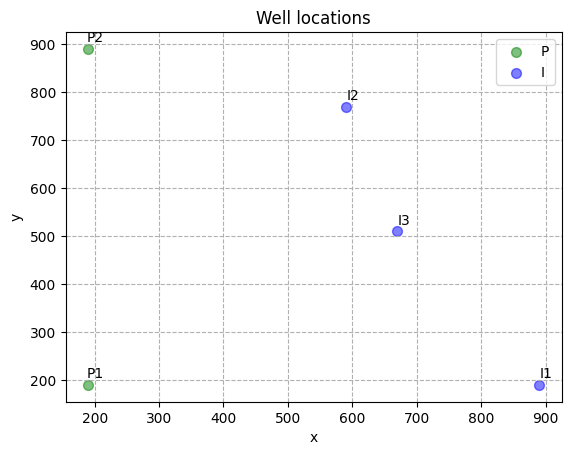

In [3]:
# create a dictionary that maps categories to colors
color_dict = {"P": "green", "I": "blue"}

# generate a scatter plot with color-coded points
for group, color in color_dict.items():
    df_cat = df_coords[df_coords["group"] == group]
    plt.scatter(df_cat["x"], df_cat["y"], s=50, alpha=0.5, color=color, label=group)

for i, row in df_coords.iterrows():
    plt.annotate(
        row["cat"],
        (row["x"], row["y"]),
        textcoords="offset points",
        xytext=(5, 5),
        ha="center",
        color="k",  # change the text color to red
    )

# add labels and legend
plt.title("Well locations")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(ls="--")
plt.legend()

In [4]:
# load data

path = "data.csv"
df = pd.read_csv(path)
print(df.sample(5).to_markdown())
df.head()

|       | cat   | group   |   date |           oil |        water |      liquid |         bhp |   status |   start_lag |   coef | is_base   |
|------:|:------|:--------|-------:|--------------:|-------------:|------------:|------------:|---------:|------------:|-------:|:----------|
|  3111 | P2    | P       |     22 |  -0.000334117 | -0.00278124  | -0.00311535 | 2e+07       |        1 |           1 |   0.42 | False     |
| 18433 | I2    | I       |     26 | nan           |  0.001267    |  0.001267   | 3.28884e+07 |        1 |          17 |   0.5  | False     |
| 14305 | P1    | P       |     11 |  -0.0015454   | -0.000984313 | -0.00252971 | 2e+07       |        1 |           9 |   0.67 | False     |
| 22111 | P2    | P       |     12 |  -0.000777115 | -0.00200096  | -0.00277807 | 2e+07       |        1 |          10 |   0.25 | False     |
| 18051 | P2    | P       |     10 |  -0.000883308 | -0.00146618  | -0.00234949 | 2e+07       |        1 |          19 |   0.5  | False     |


,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.001621,0.000000,-0.001621,2.000000e+07,1.0,19.0,0.42,False
1,P2,P,0,-0.001903,0.000000,-0.001903,2.000000e+07,1.0,19.0,0.42,False
2,I1,I,0,NaN,0.002533,0.002533,4.018987e+07,1.0,19.0,0.42,False
3,I2,I,0,NaN,0.001267,0.001267,3.665494e+07,1.0,19.0,0.42,False
4,I3,I,0,NaN,NaN,NaN,NaN,0.0,19.0,0.42,False


In [5]:
# define the colormap to use
cmap = plt.get_cmap("Set2")

coefs = sorted(df["coef"].unique())

# convert the coefs list to a numpy array
coefs = np.array(coefs)

# use isnan() to create a boolean array indicating which values are NaN
mask = np.isnan(coefs)

# use the boolean array to select only the non-NaN values
coefs = coefs[~mask]

# generate a list of colors, one for each category
colors = cmap(np.linspace(0, 1, len(coefs)))

# create a dictionary that maps categories to colors
color_dict = dict(zip(coefs, colors))
color_dict

{0.08: array([0.4       , 0.76078431, 0.64705882, 1.        ]),
 0.17: array([0.98823529, 0.55294118, 0.38431373, 1.        ]),
 0.25: array([0.55294118, 0.62745098, 0.79607843, 1.        ]),
 0.33: array([0.90588235, 0.54117647, 0.76470588, 1.        ]),
 0.42: array([0.65098039, 0.84705882, 0.32941176, 1.        ]),
 0.5: array([1.        , 0.85098039, 0.18431373, 1.        ]),
 0.58: array([0.89803922, 0.76862745, 0.58039216, 1.        ]),
 0.67: array([0.70196078, 0.70196078, 0.70196078, 1.        ])}

Text(0.5, 0, 'timestamp')

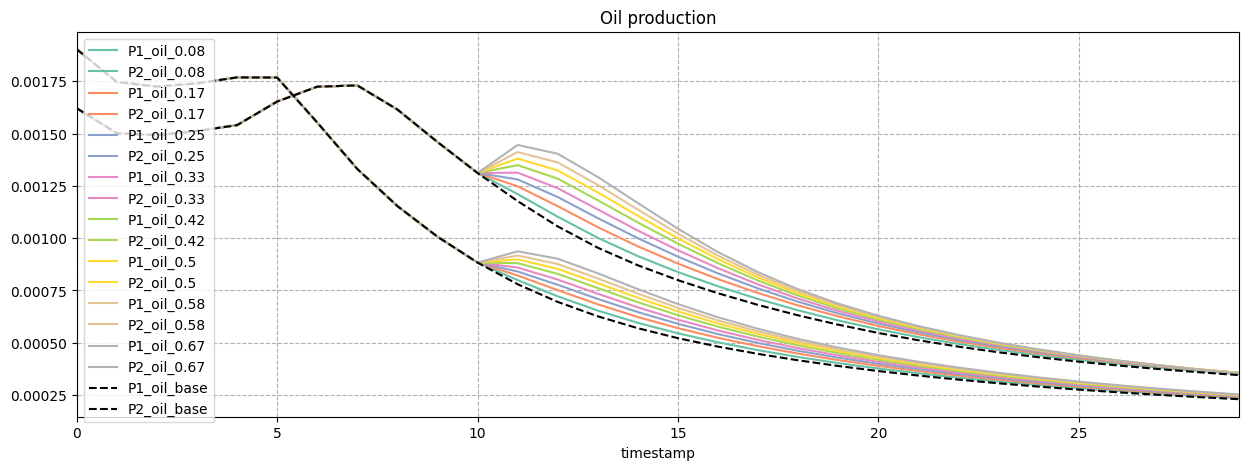

In [6]:
# create a new figure with a single set of axes
fig, ax = plt.subplots(figsize=(15, 5))

# iterate over all combinations of coef, start_lag, and segment
for coef, start_lag, segment in itertools.product(
    coefs,
    df["start_lag"].unique()[3:4],
    df["cat"].unique()[:2],
):
    data = df[
        (df["cat"] == segment) & (df["coef"] == coef) & (df["start_lag"] == start_lag)
    ]
    # select the color for the plot based on the category
    color = color_dict[coef]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["oil"]),
        label=f"{segment}_oil_{coef}",
        color=color,
    )

for segment in df["cat"].unique()[:2]:
    data = df[(df["cat"] == segment) & (df["is_base"] == True)]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["oil"]),
        label=f"{segment}_oil_base",
        color="k",
        ls="--",
    )

# set the x-axis limits, legend location, title, and grid
ax.set_xlim(df["date"].min(), df["date"].max())
ax.legend(loc="upper left")
ax.set_title("Oil production")
ax.grid(ls="--")
ax.set_xlabel("timestamp")

In [7]:
df["start_lag"].unique()[3:4]

array([10.])

When the `I3` well was activated during the 19th timestep, the oil production rates (`oil`) of `P1` & `P2` began to increase. This can be attributed to the injection of water by the `I3` well into the reservoir, which supports the reservoir pressure. As a result, the reservoir pressure increases and enhances the force that drives the fluid out of the reservoir.

Text(0.5, 0, 'timestamp')

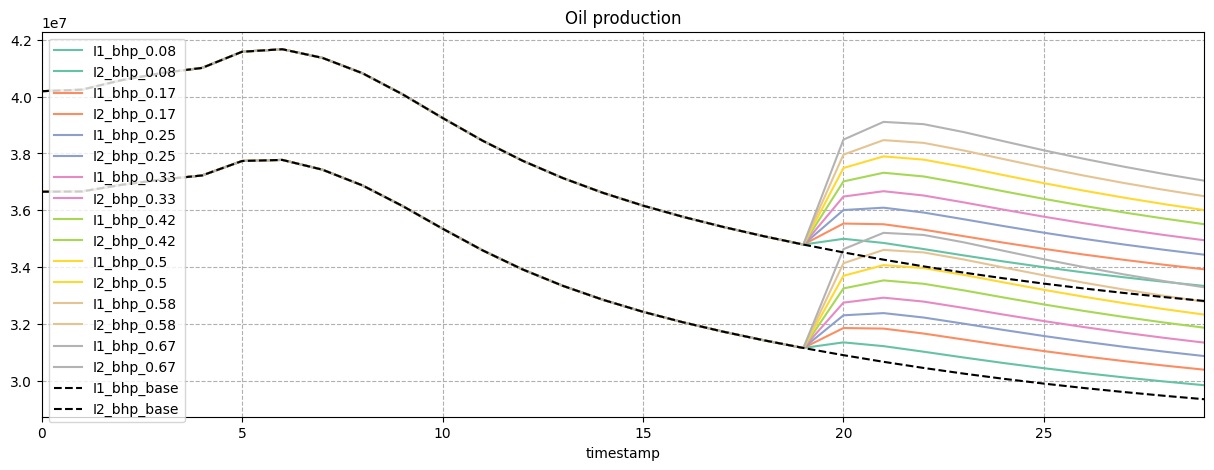

In [8]:
# create a new figure with a single set of axes
fig, ax = plt.subplots(figsize=(15, 5))

# iterate over all combinations of coef, start_lag, and segment
for coef, start_lag, segment in itertools.product(
    coefs,
    df["start_lag"].unique()[:1],
    df["cat"].unique()[2:4],
):
    data = df[
        (df["cat"] == segment) & (df["coef"] == coef) & (df["start_lag"] == start_lag)
    ]
    # select the color for the plot based on the category
    color = color_dict[coef]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        data["bhp"],
        label=f"{segment}_bhp_{coef}",
        color=color,
    )

for segment in df["cat"].unique()[2:4]:
    data = df[(df["cat"] == segment) & (df["is_base"] == True)]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["bhp"]),
        label=f"{segment}_bhp_base",
        color="k",
        ls="--",
    )

# set the x-axis limits, legend location, title, and grid
ax.set_xlim(df["date"].min(), df["date"].max())
ax.legend(loc="upper left")
ax.set_title("Oil production")
ax.grid(ls="--")
ax.set_xlabel("timestamp")

Furthermore, the bottomhole pressure (`bhp`) of the wells `I1` & `I2` began to increase after `I3` activation during the 19th timestep. This can be attributed to the water injection by the `I3` well into the reservoir, which supports the reservoir pressure and helps maintain the `bhp`.

In [9]:
# your code here